# Import Library

In [ ]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [ ]:
#application dataset

df_app_train = pd.read_csv('application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

### Distribusi Target Berdasarkan Tipe Kontrak

In [ ]:
eda1 = df_app_train.groupby(['NAME_CONTRACT_TYPE','TARGET']).agg({'SK_ID_CURR' : ['count']}).reset_index()
eda1.columns = ['Contract Type','Target','Count']
eda1['%']    = round(eda1['Count'] / eda1.groupby('Contract Type')['Count'].transform('sum')*100,2)

eda1 = pd.pivot_table(eda1, index = 'Contract Type', columns = 'Target', values = '%')

In [ ]:
eda1

Target,0,1
Contract Type,,
Cash loans,91.60,8.40
Revolving loans,94.48,5.52


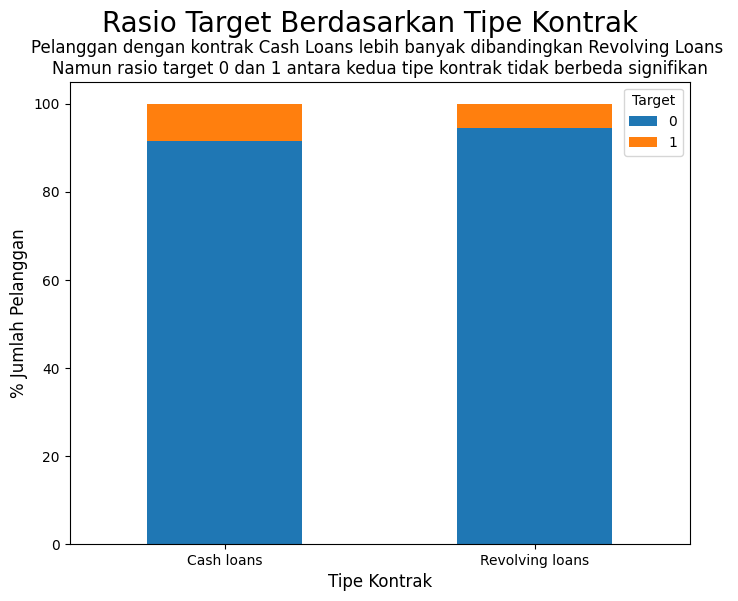

In [ ]:
eda1.plot(kind='bar',
          stacked=True,
          figsize=(8, 6))

plt.suptitle('Rasio Target Berdasarkan Tipe Kontrak', size=20, y=1)
plt.title('Pelanggan dengan kontrak Cash Loans lebih banyak dibandingkan Revolving Loans \n'
          'Namun rasio target 0 dan 1 antara kedua tipe kontrak tidak berbeda signifikan', size=12)

plt.xticks(rotation=0)
plt.xlabel('Tipe Kontrak', size=12)
plt.ylabel('% Jumlah Pelanggan', size=12)

plt.show()

Berdasarkan jumlahnya, pelanggan dengan tipe kontrak Cash loans memiliki jumlah lebih banyak dibandingkan Revolving loans. Lalu jika dilihat dari persentase antara target, perbedaan antara kedua jenis tipe kontrak tidak berbeda signifikan. <br>
Disarankan untuk membuat campaign untuk menambah minat customer terhadap pinjaman revolving loan.

#Distribusi Tipe Pekerjaan

In [ ]:
occupation_counts = df_app_train['OCCUPATION_TYPE'].value_counts()
accepted_occupation_counts = df_app_train[df_app_train['TARGET'] == 0]['OCCUPATION_TYPE'].value_counts()
rejected_occupation_counts = df_app_train[df_app_train['TARGET'] == 1]['OCCUPATION_TYPE'].value_counts()

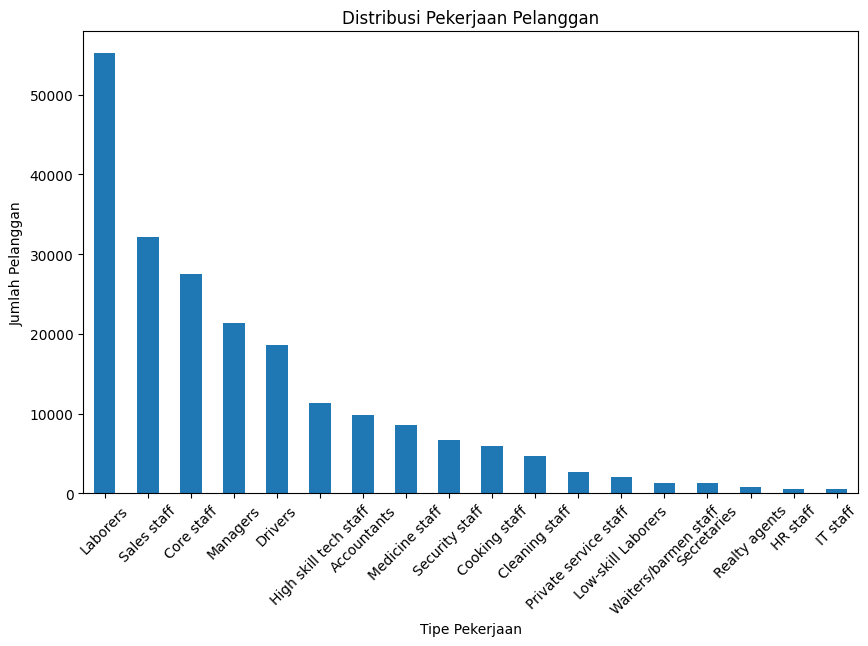

In [ ]:
# Plotting the job type distribution
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Distribusi Pekerjaan Pelanggan')
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

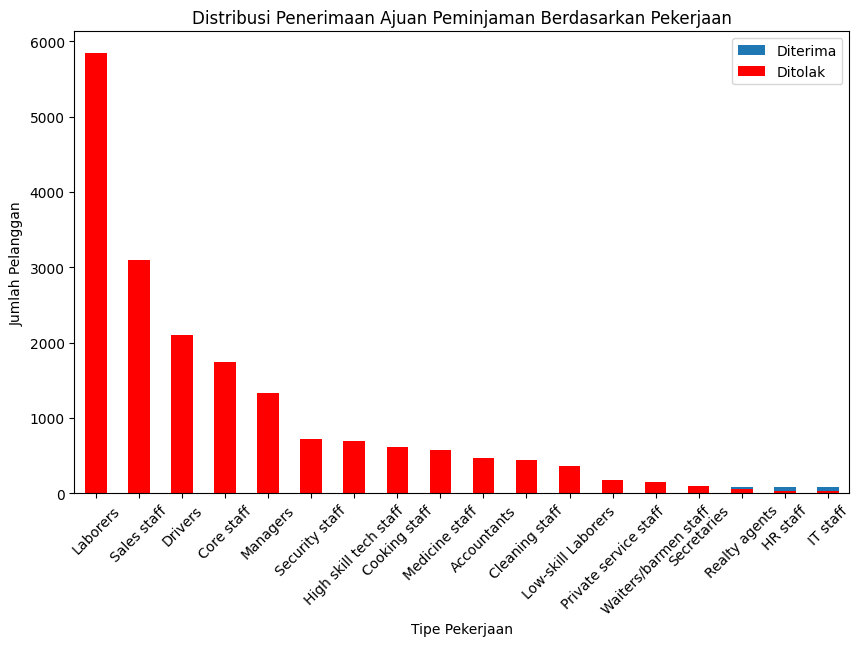

In [ ]:
# Calculate acceptance rate for each occupation type
acceptance_rate = accepted_occupation_counts / occupation_counts * 100

# Sort the occupation types by acceptance rate
sorted_occupations = acceptance_rate.sort_values(ascending=False)

# Plotting the acceptance rate for each occupation type
plt.figure(figsize=(10, 6))
sorted_occupations.plot(kind='bar', label='Diterima')
rejected_occupation_counts.plot(kind='bar', color='red', label='Ditolak')
plt.title('Distribusi Penerimaan Ajuan Peminjaman Berdasarkan Pekerjaan')
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.xticks(rotation=45)
plt.show()

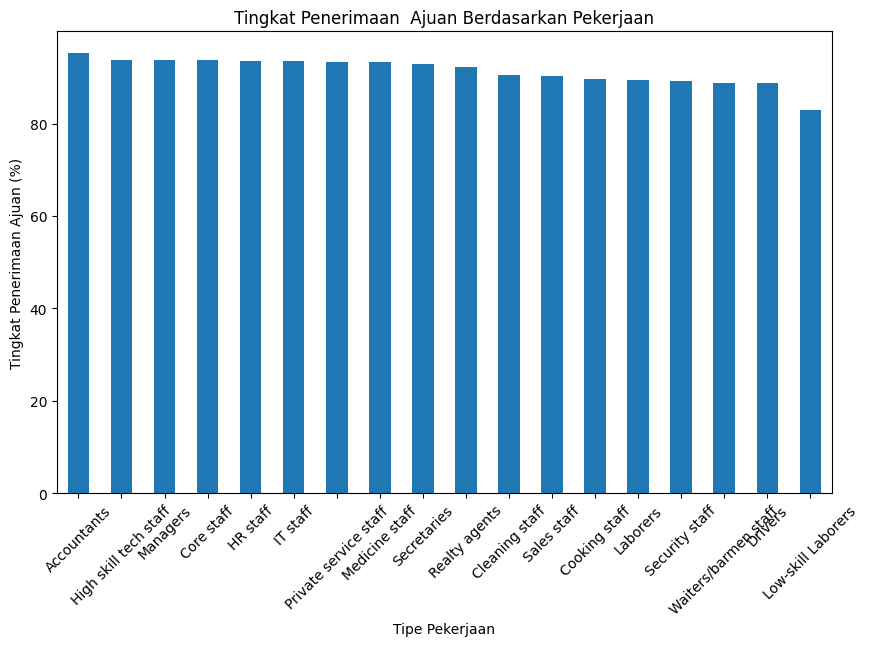

In [ ]:
# Sort the occupation types by acceptance rate in descending order
sorted_occupations = acceptance_rate.sort_values(ascending=False)

# Plotting the acceptance rate for each occupation type
plt.figure(figsize=(10, 6))
sorted_occupations.plot(kind='bar')
plt.title('Tingkat Penerimaan  Ajuan Berdasarkan Pekerjaan')
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Tingkat Penerimaan Ajuan (%)')
plt.xticks(rotation=45)
plt.show()

### Kepemilikan Properti dan Mobil pada Pelanggan

In [ ]:
eda2 = df_app_train.groupby(['FLAG_OWN_CAR','FLAG_OWN_REALTY']).agg({'SK_ID_CURR' : ['count']})

Property = pd.Index(['No Realty and Car','Have Realty, No Car','No Realty, Have Car','Have Car and Realty'])
eda2 = eda2.set_index(Property)

In [ ]:
eda2

,SK_ID_CURR
,count
No Realty and Car,37703
"Have Realty, No Car",85320
"No Realty, Have Car",19490
Have Car and Realty,43851


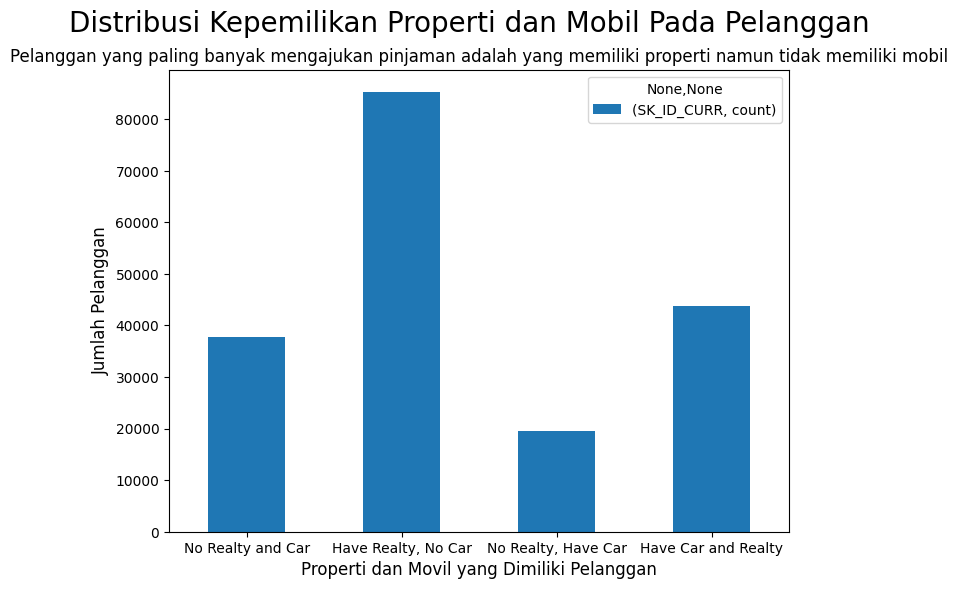

In [ ]:
eda2.plot(kind='bar', figsize=(8, 6))

plt.suptitle('Distribusi Kepemilikan Properti dan Mobil Pada Pelanggan', size=20)
plt.title('Pelanggan yang paling banyak mengajukan pinjaman adalah yang memiliki properti namun tidak memiliki mobil', size=12)

plt.xticks(rotation=0)
plt.xlabel('Properti dan Movil yang Dimiliki Pelanggan', size=12)
plt.ylabel('Jumlah Pelanggan', size=12)

plt.show()

Pelanggan yang paling banyak mengajukan pinjaman adalah yang memiliki realty namun tidak memiliki mobil. Sedangkan yang paling sedikit adalah pelanggan yang punya mobil namun tidak memiliki realty. <br>
Rekomendasi : Buat kampanye untuk ajuan kredit mobil dan properti.  

### Distribusi Usia Pelanggan

In [ ]:
df_app_train['AGE'] = round(abs(df_app_train['DAYS_BIRTH']/(365)),0)

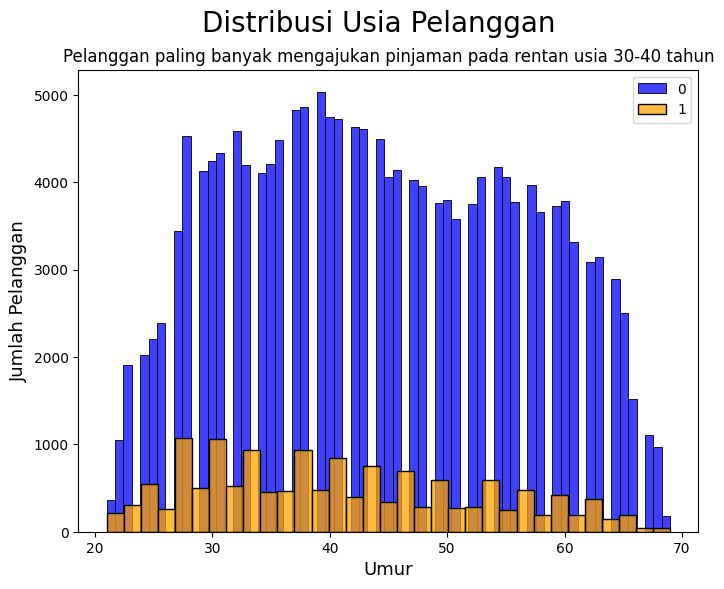

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df_app_train[df_app_train['TARGET']==0]['AGE'], color='blue', ax=ax, label='0')
sns.histplot(df_app_train[df_app_train['TARGET']==1]['AGE'], color='orange', ax=ax, label='1')

plt.suptitle('Distribusi Usia Pelanggan', size=20)
plt.title('Pelanggan paling banyak mengajukan pinjaman pada rentan usia 30-40 tahun', size=12)

plt.xlabel('Umur', fontsize=13)
plt.ylabel('Jumlah Pelanggan', fontsize=13)

plt.legend()
plt.show()

Distribusi usia pelanggan cenderung normal dengan pelanggan paling banyak pada rentan usia 30-40 tahun. <br>
Disarankan untuk meningkatkan campaign untuk pelanggan pada rentan usia tersebut.

# Data Preprocessing

## Null data

In [ ]:
df_app_train.shape

(186364, 123)

In [ ]:
#Null value pada dataset train

null_value = pd.DataFrame((df_app_train.isnull().sum()/len(df_app_train)*100).sort_values(ascending=False))
pd.set_option('display.max_rows', None)
print(null_value)
pd.reset_option('all')

                                      0
COMMONAREA_AVG                69.912107
COMMONAREA_MEDI               69.912107
COMMONAREA_MODE               69.912107
NONLIVINGAPARTMENTS_MEDI      69.442596
NONLIVINGAPARTMENTS_MODE      69.442596
NONLIVINGAPARTMENTS_AVG       69.442596
LIVINGAPARTMENTS_MEDI         68.395720
LIVINGAPARTMENTS_MODE         68.395720
LIVINGAPARTMENTS_AVG          68.395720
FONDKAPREMONT_MODE            68.394110
FLOORSMIN_MEDI                67.874160
FLOORSMIN_MODE                67.874160
FLOORSMIN_AVG                 67.874160
YEARS_BUILD_MODE              66.503724
YEARS_BUILD_MEDI              66.503724
YEARS_BUILD_AVG               66.503724
OWN_CAR_AGE                   66.013286
LANDAREA_AVG                  59.413299
LANDAREA_MEDI                 59.413299
LANDAREA_MODE                 59.413299
BASEMENTAREA_MODE             58.571934
BASEMENTAREA_MEDI             58.571934
BASEMENTAREA_AVG              58.571934
EXT_SOURCE_1                  56.323646


Kolom dengan nilai null melebihi 30% dihilangkan.

In [ ]:
df_app_train = df_app_train.drop(columns = null_value[null_value[0]>30].index)

Untuk kolom dengan nilai null kurang dari 1%, baris dengan nilai null akan dihilangkan

In [ ]:
df_app_train = df_app_train.dropna(subset=['NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                           'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2',
                                           'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE'])

## Imputation

Data null akan diimputasi dengan nilai median

In [ ]:
for i in ['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY']:
    df_app_train[i].fillna(df_app_train[i].median(), inplace=True)

## Duplicate Data

In [ ]:
df_app_train.duplicated().sum()

0

Tidak ada baris duplikatv pada dataset

## Feature Engineering

Fitur `AGE` sudah ditambah pada tahap EDA. <br>
Fitur yang tidak relevan / diperlukan akan dihapus.

In [ ]:
for i in ['SK_ID_CURR','DAYS_BIRTH','NAME_TYPE_SUITE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_DAY',
          'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
          'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE',
          'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
    df_app_train = df_app_train.drop(columns = i)

## Unsuitable Values

Kesesuaian nilai pada tiap fitur diperiksa.

In [ ]:
df_app_train['CODE_GENDER'].value_counts()

F      121325
M       63245
XNA         3
Name: CODE_GENDER, dtype: int64

In [ ]:
#XNA diasumsikan M
df_app_train['CODE_GENDER'] = df_app_train['CODE_GENDER'].replace('XNA','M')

In [ ]:
print(df_app_train['FLAG_MOBIL'].value_counts())

1    184573
Name: FLAG_MOBIL, dtype: int64


In [ ]:
#Fitur hanya punta 1 nilai, sehingga dihilangkan
df_app_train = df_app_train.drop(columns = ['FLAG_MOBIL'])

In [ ]:
df_app_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    41037
XNA                       33201
Self-employed             22871
Other                      9961
Medicine                   6728
Business Entity Type 2     6395
Government                 6208
School                     5372
Trade: type 7              4666
Kindergarten               4158
Construction               3976
Business Entity Type 1     3588
Transport: type 4          3216
Trade: type 3              2043
Industry: type 3           1998
Security                   1991
Industry: type 9           1980
Housing                    1754
Industry: type 11          1630
Military                   1585
Bank                       1515
Agriculture                1481
Police                     1414
Transport: type 2          1339
Postal                     1324
Security Ministries        1222
Trade: type 2              1136
Restaurant                 1089
Services                    937
University                  811
Industry: type 7            789
Transpor

In [ ]:
#Fitur terlalu banyak nilai unik dan nilai XNA sangat banyak, sehingga fitur dihapus
df_app_train = df_app_train.drop(columns = ['ORGANIZATION_TYPE'])

In [ ]:
df_app_train['NAME_INCOME_TYPE'].value_counts()

Working                 95491
Commercial associate    42950
Pensioner               33194
State servant           12907
Unemployed                 12
Student                    11
Businessman                 6
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
#Nilai dengan value counts yang sangat sedikit dihilangkan
for i in ['Unemployed','Student','Businessman','Maternity leave']:
    df_app_train = df_app_train[(df_app_train['NAME_INCOME_TYPE'] != i)]

In [ ]:
for i in ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
          'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
          'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
          'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']:
    print(df_app_train[i].value_counts())
    print('----'*10)

0.0    184535
1.0         7
Name: FLAG_DOCUMENT_2, dtype: int64
----------------------------------------
1.0    131756
0.0     52786
Name: FLAG_DOCUMENT_3, dtype: int64
----------------------------------------
0.0    184523
1.0        19
Name: FLAG_DOCUMENT_4, dtype: int64
----------------------------------------
0.0    181789
1.0      2753
Name: FLAG_DOCUMENT_5, dtype: int64
----------------------------------------
0.0    168391
1.0     16151
Name: FLAG_DOCUMENT_6, dtype: int64
----------------------------------------
0.0    184512
1.0        30
Name: FLAG_DOCUMENT_7, dtype: int64
----------------------------------------
0.0    169559
1.0     14983
Name: FLAG_DOCUMENT_8, dtype: int64
----------------------------------------
0.0    183838
1.0       704
Name: FLAG_DOCUMENT_9, dtype: int64
----------------------------------------
0.0    184537
1.0         5
Name: FLAG_DOCUMENT_10, dtype: int64
----------------------------------------
0.0    183818
1.0       724
Name: FLAG_DOCUMENT_11, dt

In [ ]:
#Beberapa kolom flag_document memiliki distribusi nilai dengan data minoritas yang sangat sedikit
#Kolom demikian didrop karena imbalance dan tidak berpengaruh besar pada modeling

for i in ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
          'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']:
    df_app_train = df_app_train.drop(columns = i)

# Statistical Summary

In [ ]:
nums = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
        'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
        'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8',
        'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','DAYS_LAST_PHONE_CHANGE','AGE']

cats = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']

In [ ]:
df_app_train[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,184542.0,0.418317,0.724899,0.000000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,184542.0,168772.571905,290383.089764,25650.000000,112500.000000,144000.00000,202500.000000,1.170000e+08
AMT_CREDIT,184542.0,599881.127597,402696.728502,45000.000000,270000.000000,514777.50000,808650.000000,4.050000e+06
AMT_ANNUITY,184542.0,27164.331177,14549.669346,1980.000000,16573.500000,24939.00000,34681.500000,2.580255e+05
AMT_GOODS_PRICE,184542.0,538794.075739,369699.845650,45000.000000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,184542.0,0.020860,0.013822,0.000533,0.010006,0.01885,0.028663,7.250800e-02
DAYS_EMPLOYED,184542.0,63734.843093,141205.092016,-17531.000000,-2757.000000,-1216.00000,-289.000000,3.652430e+05
DAYS_REGISTRATION,184542.0,-4980.890518,3522.706701,-23738.000000,-7468.000000,-4490.00000,-2008.000000,0.000000e+00
DAYS_ID_PUBLISH,184542.0,-2995.366968,1510.652227,-7197.000000,-4300.000000,-3257.00000,-1718.000000,0.000000e+00
FLAG_EMP_PHONE,184542.0,0.820106,0.384100,0.000000,1.000000,1.00000,1.000000,1.000000e+00


In [ ]:
df_app_train[cats].describe().T

,count,unique,top,freq
FLAG_OWN_CAR,184542,2,N,121785
FLAG_OWN_REALTY,184542,2,Y,128169
NAME_CONTRACT_TYPE,184542,2,Cash loans,167646
CODE_GENDER,184542,2,F,121309
NAME_INCOME_TYPE,184542,4,Working,95491
NAME_EDUCATION_TYPE,184542,5,Secondary / secondary special,131255
NAME_FAMILY_STATUS,184542,5,Married,118244
NAME_HOUSING_TYPE,184542,6,House / apartment,163831
WEEKDAY_APPR_PROCESS_START,184542,7,TUESDAY,32291


# Correlation

<Axes: >

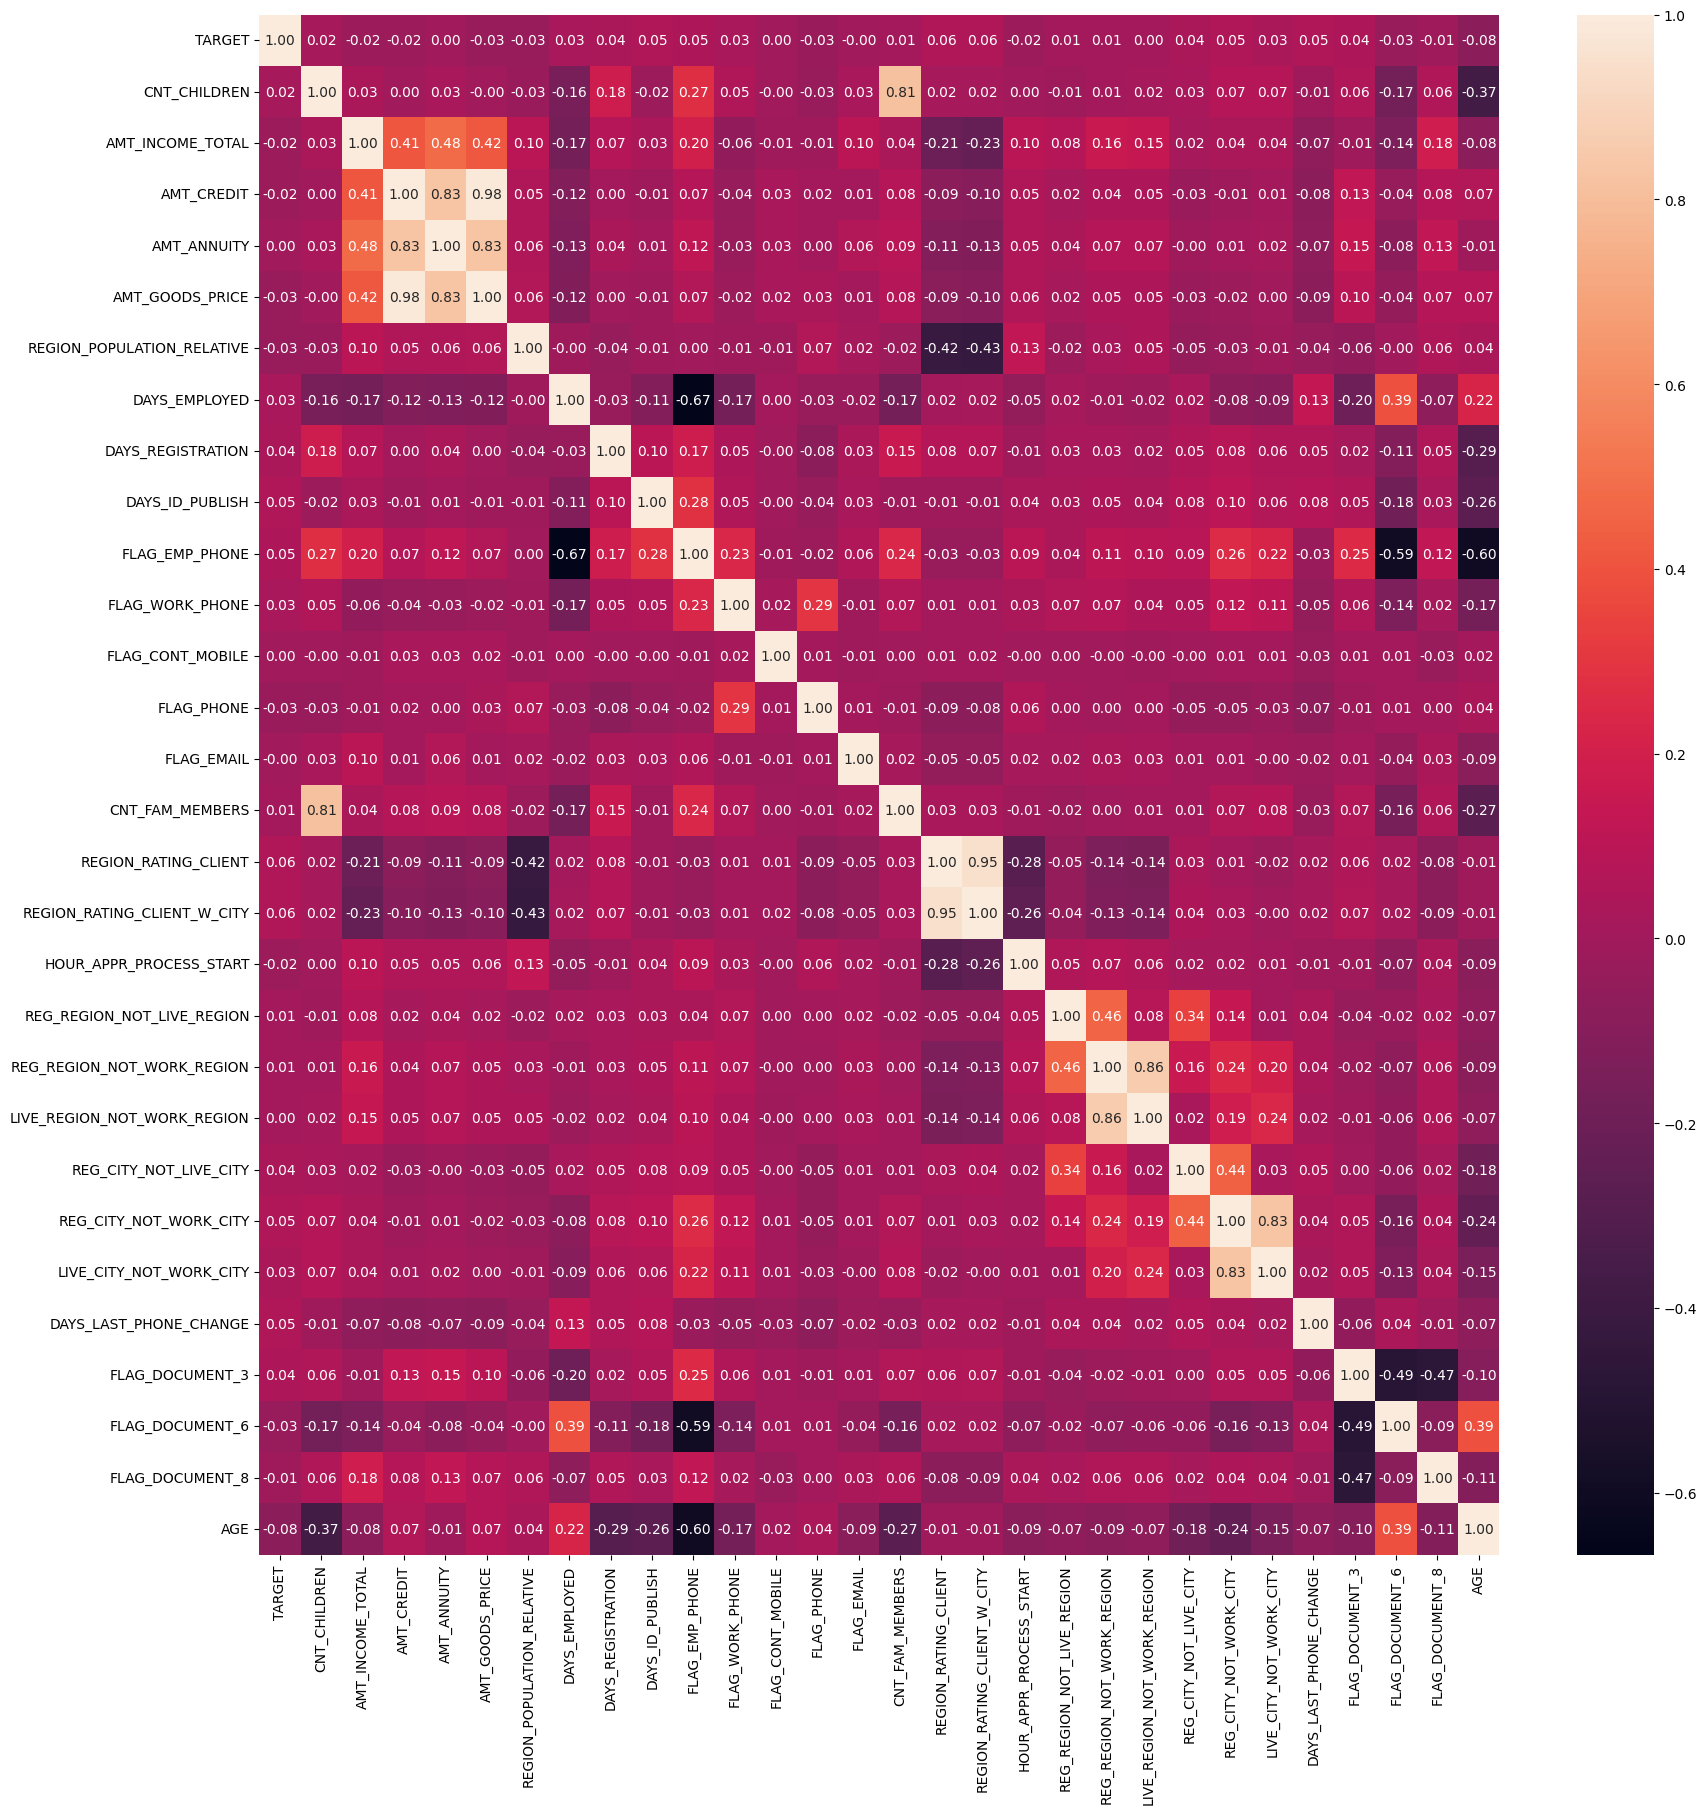

In [ ]:
#Dipilih metode spearman karena terdapat outlier pada data dan diasumsikan fitur tidak berhubungan secara linier

r = df_app_train.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(r, annot=True, fmt='.2f')

Tidak ada fitur yang berkorelasi kuat dengan TARGET. <br>
Beberapa fitur yang tidak ada korelasi kuat dengan fitur lain didrop.

In [ ]:
df_app_train = df_app_train.drop(columns=['FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE'])

# Feature Encoding

In [ ]:
for i in cats:
    print(df_app_train[i].value_counts())
    print('-----'*5)

N    121785
Y     62757
Name: FLAG_OWN_CAR, dtype: int64
-------------------------
Y    128169
N     56373
Name: FLAG_OWN_REALTY, dtype: int64
-------------------------
Cash loans         167646
Revolving loans     16896
Name: NAME_CONTRACT_TYPE, dtype: int64
-------------------------
F    121309
M     63233
Name: CODE_GENDER, dtype: int64
-------------------------
Working                 95491
Commercial associate    42950
Pensioner               33194
State servant           12907
Name: NAME_INCOME_TYPE, dtype: int64
-------------------------
Secondary / secondary special    131255
Higher education                  44808
Incomplete higher                  6120
Lower secondary                    2259
Academic degree                     100
Name: NAME_EDUCATION_TYPE, dtype: int64
-------------------------
Married                 118244
Single / not married     27038
Civil marriage           17805
Separated                11816
Widow                     9639
Name: NAME_FAMILY_STATUS, dt

In [ ]:
#Label Encoding
map_car = {'N' : 0,
           'Y' : 1}

map_realty = {'N' : 0,
              'Y' : 1}

map_contract = {'Cash loans' : 0,
                'Revolving loans' : 1}

map_gender = {'M' : 0,
              'F' : 1}

map_education = {'Lower secondary'               : 0,
                 'Secondary / secondary special' : 1,
                 'Incomplete higher'             : 2,
                 'Higher education'              : 3,
                 'Academic degree'               : 4}

df_app_train['FLAG_OWN_CAR']        = df_app_train['FLAG_OWN_CAR'].map(map_car)
df_app_train['FLAG_OWN_REALTY']     = df_app_train['FLAG_OWN_REALTY'].map(map_realty)
df_app_train['NAME_CONTRACT_TYPE']  = df_app_train['NAME_CONTRACT_TYPE'].map(map_contract)
df_app_train['CODE_GENDER']         = df_app_train['CODE_GENDER'].map(map_gender)
df_app_train['NAME_EDUCATION_TYPE'] = df_app_train['NAME_EDUCATION_TYPE'].map(map_education)

In [ ]:
#One hot encoding

for i in ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']:
    ohe = pd.get_dummies(df_app_train[i], prefix=i)
    df_app_train = df_app_train.join(ohe)
    df_app_train = df_app_train.drop(columns=i)

# Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
          'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
          'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','AGE']:
    df_app_train[i] = df_app_train[i].astype(str).astype(float)
    df_app_train[i] = StandardScaler().fit_transform(df_app_train[i].values.reshape(len(df_app_train),1))

In [ ]:
df_app_train.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
23246,1,0,0,0,0,0.802436,0.038664,0.231988,0.144895,0.161499,...,0,0,0,0,1,0,0,0,0,0
128152,0,0,1,1,1,0.802436,0.116148,-0.930929,-0.737499,-0.848783,...,0,0,0,0,0,0,0,0,0,1
105046,0,0,1,1,1,-0.577071,-0.224782,-0.214430,-0.303570,-0.215835,...,0,0,0,0,1,0,0,0,0,0
159769,1,0,1,1,1,0.802436,0.069658,-0.324635,0.314075,-0.361900,...,0,0,0,0,1,0,0,0,0,0
172360,0,0,1,0,0,-0.577071,0.193632,0.298287,-0.420171,0.490145,...,0,0,0,0,0,0,1,0,0,0


# Class Imbalance

In [ ]:
x_std = df_app_train.drop(columns = 'TARGET')
y_std = df_app_train['TARGET']

In [ ]:
y_std.value_counts()

0    169495
1     15047
Name: TARGET, dtype: int64

Data imbalance karena nilai minoritas hanya 8% dari dataset. <br>
Dilakukan undersampling

In [ ]:
from imblearn import under_sampling

x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x_std, y_std)

In [ ]:
y_under.value_counts()

0    15047
1    15047
Name: TARGET, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under)

# Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def score_compare(x_train,x_test,y_train,y_test):
    result = defaultdict(list)

    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()

    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf)
                 ]

    for model_name,model in list_model:
        model.fit(x_train,y_train)

        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)

        result['model_name'].append(model_name)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)

    return result

In [ ]:
result = score_compare(x_train,x_test,y_train,y_test)
result = pd.DataFrame(result)

In [ ]:
result

,model_name,accuracy,recall,precision
0,K-Nearest Neighbor,0.555821,0.559596,0.556054
1,Logistic Regression,0.614434,0.614282,0.615098
2,Decision Tree,0.551967,0.546323,0.553226
3,Random Forest,0.621478,0.595434,0.628820


Secara overall, model logistic regression memiliki performa terbaik. Dilakukan hyperparameter tuning pada model ini.

# Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, cv=5)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.0011090909090909092,
                                              0.002118181818181818,
                                              0.0031272727272727272,
                                              0.004136363636363637,
                                              0.005145454545454546,
                                              0.006154545454545455,
                                              0.007163636363636364,
                                              0.008172727272727272,
                                              0.009181818181818182,
                                              0.01019090909090909, 0.0112,
                                              0.012209090909090909,
                                              0.013218181818181818,
                                              0.014227272727272727,
                                              0.015236363636363636,
                                              0.016245454545454546,
                                              0.017254545454545456,
                                              0.018263636363636364,
                                              0.01927272727272727,
                                              0.020281818181818182,
                                              0.021290909090909093, 0.0223,
                                              0.023309090909090908,
                                              0.02431818181818182,
                                              0.02532727272727273,
                                              0.026336363636363637,
                                              0.027345454545454544,
                                              0.028354545454545455,
                                              0.029363636363636366, ...],
                                        'penalty': ['l1', 'l2']})

In [ ]:
y_pred_hyp = rs.predict(x_test)

In [ ]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_hyp))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_hyp))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_hyp))

Accuracy (Test Set): 0.61
Precision (Test Set): 0.62
Recall (Test Set): 0.61


Hasil setelah tuning meningkat tidak signifikan.

# Evaluasi

## ROC Curve

In [ ]:
y_pred_proba = rs.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

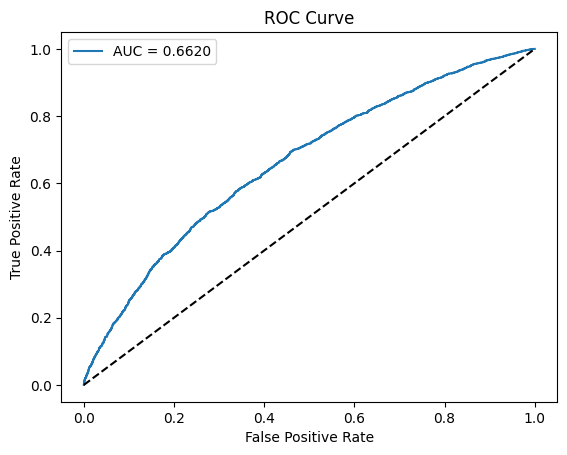

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Kolmogorov-Smirnov

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,8501,0,0.054649,1,0,1,0.000133,0.0,0.000266
1,1320,0,0.078662,2,0,2,0.000266,0.0,0.000532
2,12314,0,0.084338,3,0,3,0.000399,0.0,0.000799
3,12773,0,0.093463,4,0,4,0.000532,0.0,0.001065
4,13097,0,0.104227,5,0,5,0.000665,0.0,0.001331


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.2388')

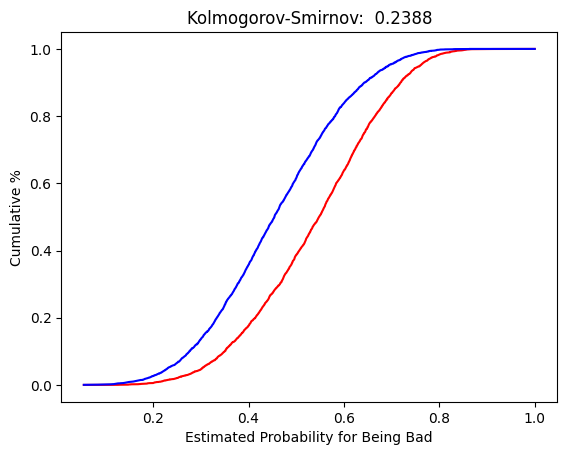

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)